In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
input_file = 'data/sorted_filled_data.pkl'

In [5]:
df = pd.read_pickle(input_file)
df = df.drop(columns=df.columns[0])
df.head()

,userid,user_state,event_name,event_attributes,event_created_date,event_platform,device_manufacture,device_model,Subscription Premium Cancel
0,0006869712ec9841dc36234bce245203,MD,Add Payment Method Success,"{""Payment Method"":""Debit"",""Tokenized Pay"":""""}",2022-01-19 18:47:45,android,samsung,SM-A716U,0
1,0006869712ec9841dc36234bce245203,MD,Subscription Premium,"{""Start Date"":""2022-01-19"",""Renewal Date"":""202...",2022-01-19 18:48:01,android,samsung,SM-A716U,0
2,0006869712ec9841dc36234bce245203,MD,Account History Transaction Details,"{""Navigated From"":""Account History"",""Status"":""...",2022-01-19 18:48:08,android,samsung,SM-A716U,0
3,0006869712ec9841dc36234bce245203,MD,Account History Transaction Details,"{""Navigated From"":""Account History"",""Status"":""...",2022-01-19 18:48:44,android,samsung,SM-A716U,0
4,0006869712ec9841dc36234bce245203,MD,Add Vehicle Success,"{""Make"":""Chevrolet"",""Model"":""Express 3500"",""Co...",2022-01-19 18:50:34,android,samsung,SM-A716U,0


In [6]:
import json

df['event_attributes'] = df['event_attributes'].apply(json.loads)

event_attributes = df['event_attributes'].to_list()
event_attributes_df = pd.DataFrame(event_attributes)

enriched_df = df.join(event_attributes_df)
enriched_df = enriched_df.drop(columns='event_attributes')

enriched_df.head()

,userid,user_state,event_name,event_created_date,event_platform,device_manufacture,device_model,Subscription Premium Cancel,Payment Method,Tokenized Pay,...,Error Code,Error Message,Screen,Transaction type,Id,Amount,Description,Google Map Installed,Selected Route Type,Transaction Type
0,0006869712ec9841dc36234bce245203,MD,Add Payment Method Success,2022-01-19 18:47:45,android,samsung,SM-A716U,0,Debit,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0006869712ec9841dc36234bce245203,MD,Subscription Premium,2022-01-19 18:48:01,android,samsung,SM-A716U,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0006869712ec9841dc36234bce245203,MD,Account History Transaction Details,2022-01-19 18:48:08,android,samsung,SM-A716U,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0006869712ec9841dc36234bce245203,MD,Account History Transaction Details,2022-01-19 18:48:44,android,samsung,SM-A716U,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0006869712ec9841dc36234bce245203,MD,Add Vehicle Success,2022-01-19 18:50:34,android,samsung,SM-A716U,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
enriched_df.columns

Index(['userid', 'user_state', 'event_name', 'event_created_date',
       'event_platform', 'device_manufacture', 'device_model',
       'Subscription Premium Cancel', 'Payment Method', 'Tokenized Pay',
       'Start Date', 'Renewal Date', 'Membership Type', 'Navigated From',
       'Status', 'Type', 'Make', 'Model', 'Color', 'Year', 'Temporary',
       'End Date', 'Rental state', 'Method', 'Premium Membership',
       'Rental State', 'Promo code', 'From', 'Required', 'Error Code',
       'Error Message', 'Screen', 'Transaction type', 'Id', 'Amount',
       'Description', 'Google Map Installed', 'Selected Route Type',
       'Transaction Type'],
      dtype='object')

In [8]:
main_cols = ['Subscription Premium Cancel']

target_cols = ['Payment Method', 'Tokenized Pay',
       'Start Date', 'Renewal Date', 'Membership Type', 'Navigated From',
       'Status', 'Type', 'Make', 'Model', 'Color', 'Year', 'Temporary',
       'End Date', 'Rental state', 'Method', 'Premium Membership',
       'Rental State', 'Promo code', 'From', 'Required', 'Error Code',
       'Error Message', 'Screen', 'Transaction type', 'Id', 'Amount',
       'Description', 'Google Map Installed', 'Selected Route Type',
       'Transaction Type']

all_cols = main_cols + target_cols

In [9]:
corr_df = enriched_df[all_cols]
corr_df.head()

,Subscription Premium Cancel,Payment Method,Tokenized Pay,Start Date,Renewal Date,Membership Type,Navigated From,Status,Type,Make,...,Error Code,Error Message,Screen,Transaction type,Id,Amount,Description,Google Map Installed,Selected Route Type,Transaction Type
0,0,Debit,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,NaN,NaN,2022-01-19,2022-02-20,Monthly,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,NaN,NaN,NaN,NaN,NaN,Account History,Pending,Auto Payment,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,NaN,NaN,NaN,NaN,NaN,Account History,Pending,Auto Payment,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,Chevrolet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
new_corr_df = pd.DataFrame()

for col in all_cols:
    new_corr_df[col] = corr_df[col].astype('category').cat.codes

new_corr_df.head()

,Subscription Premium Cancel,Payment Method,Tokenized Pay,Start Date,Renewal Date,Membership Type,Navigated From,Status,Type,Make,...,Error Code,Error Message,Screen,Transaction type,Id,Amount,Description,Google Map Installed,Selected Route Type,Transaction Type
0,0,2,0,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,0,-1,-1,28,4,0,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,0,-1,-1,-1,-1,-1,0,2,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,0,-1,-1,-1,-1,-1,0,2,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,0,-1,-1,0,-1,-1,-1,-1,-1,5,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


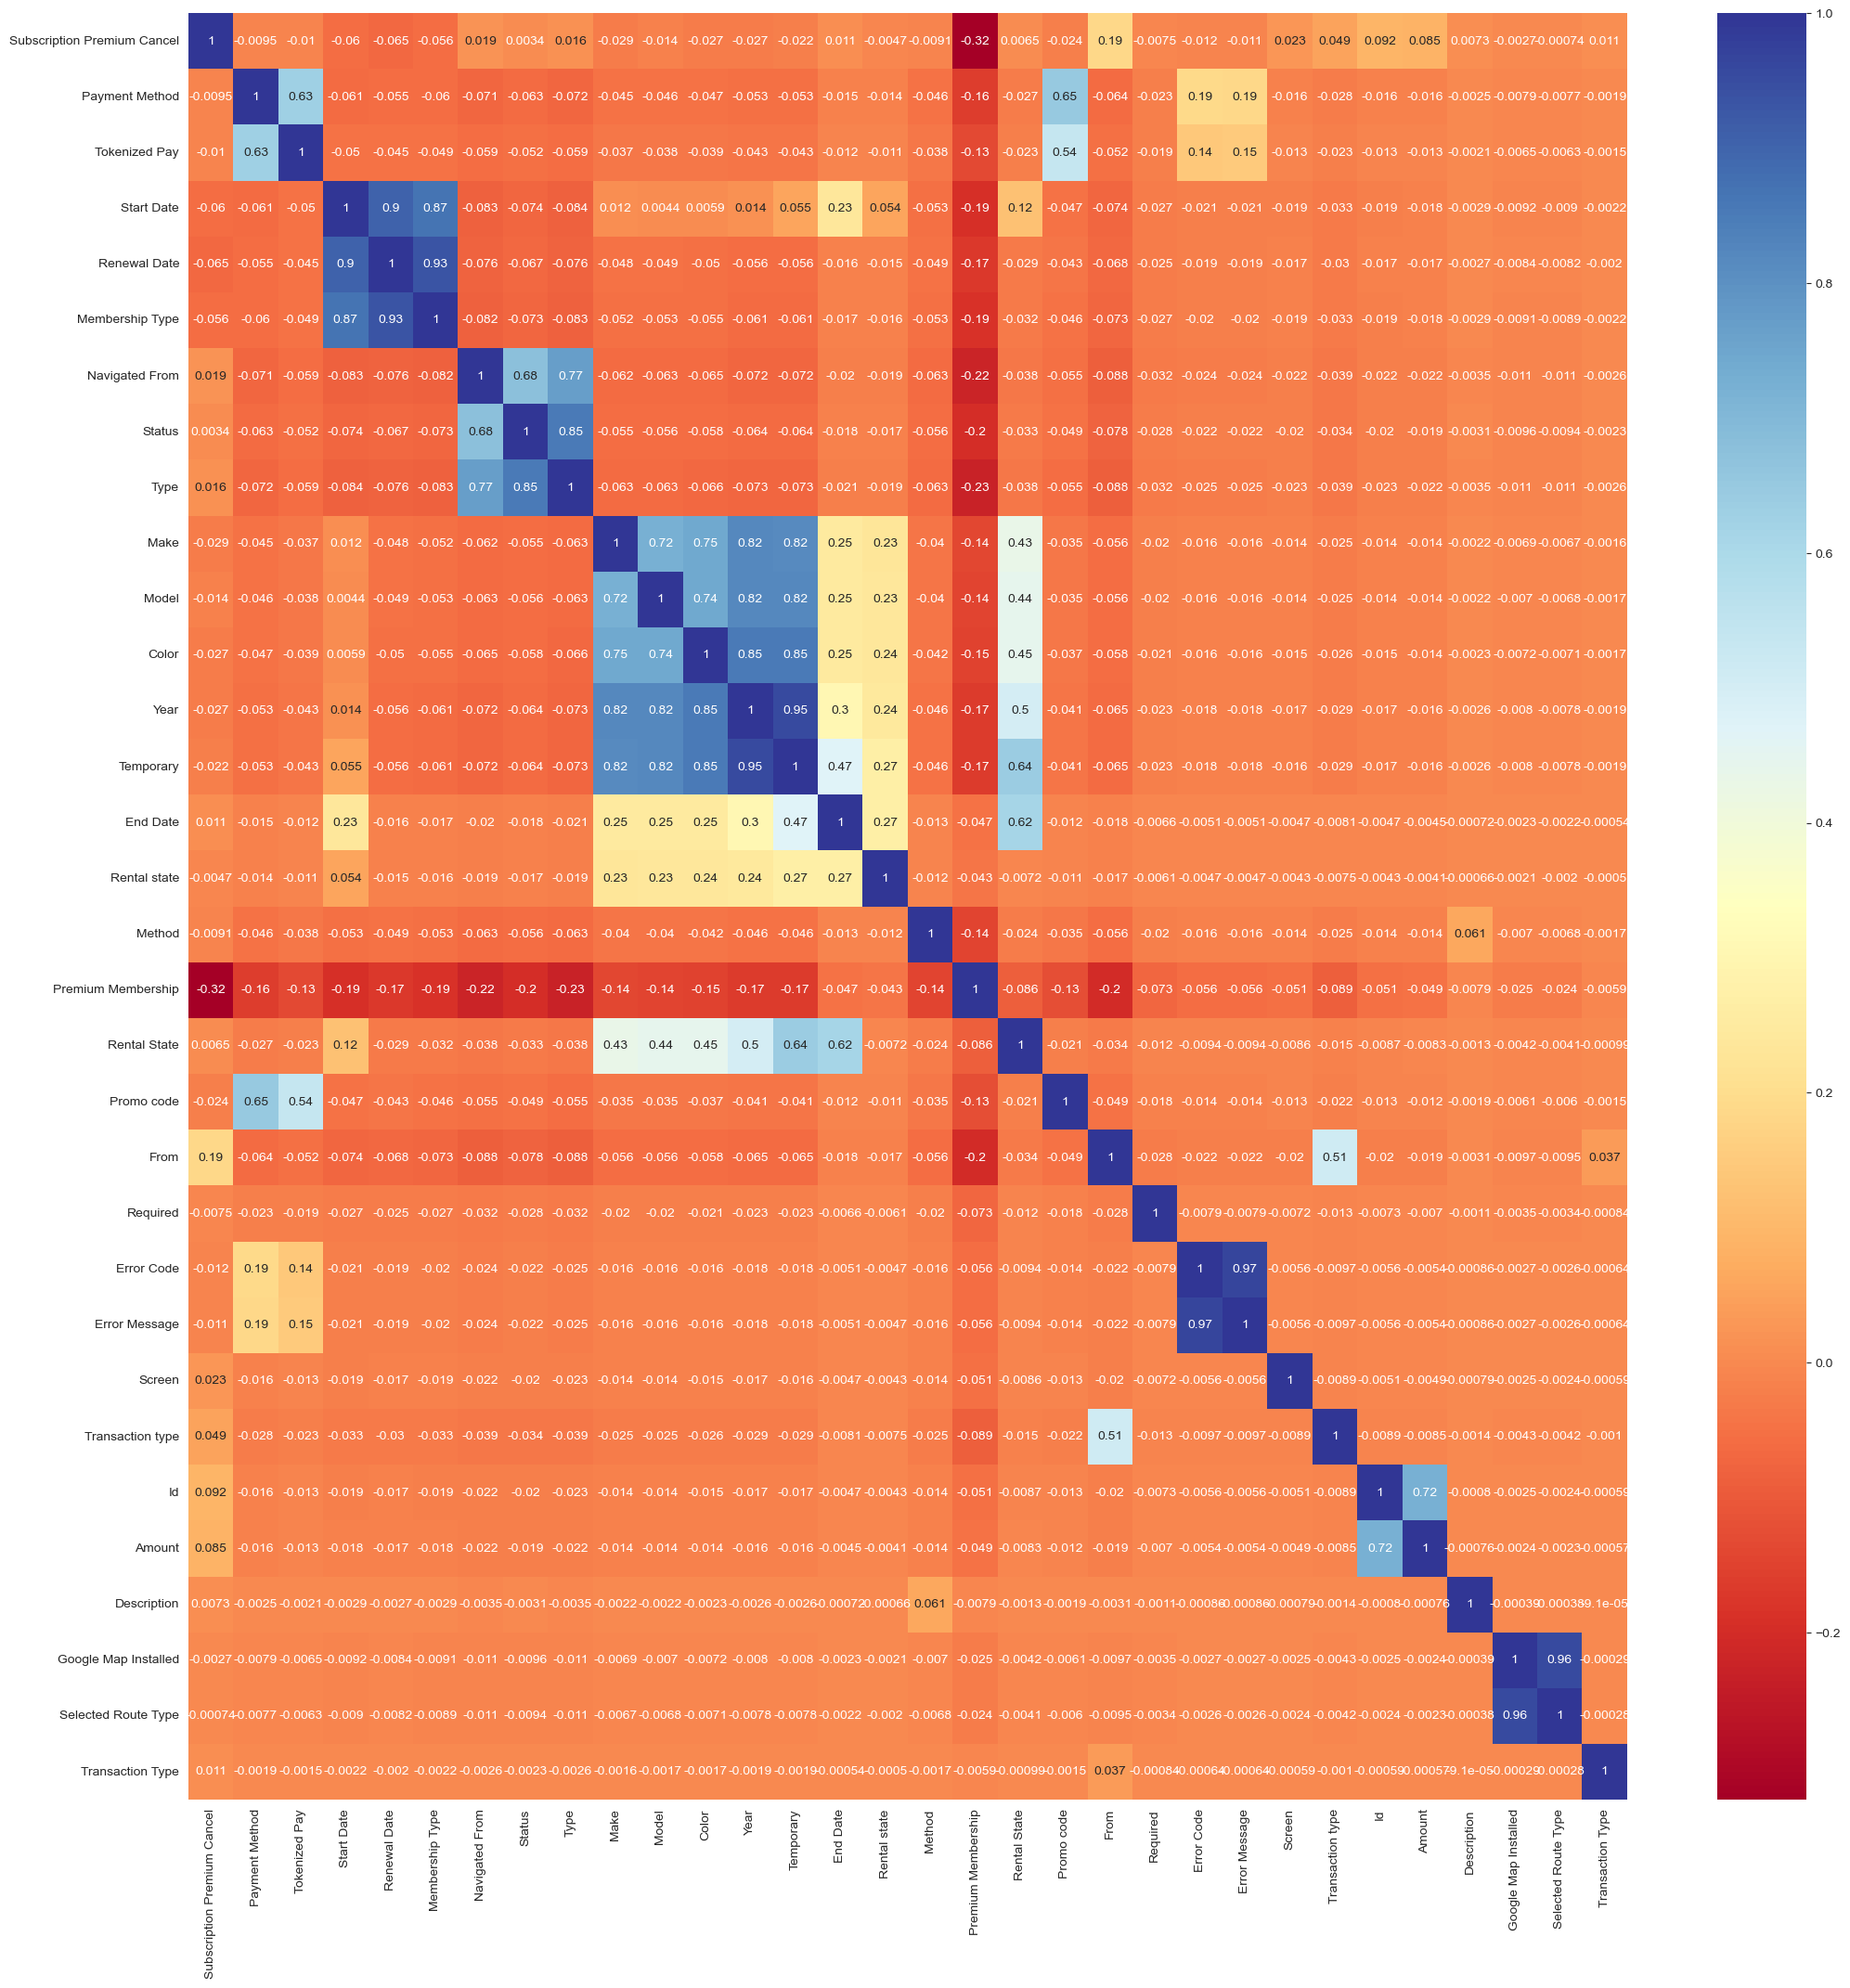

In [15]:
corr = new_corr_df.corr()

fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(corr, cmap='RdYlBu', annot=True)
plt.show()

In [23]:
from_list = enriched_df['From'].unique().tolist()

[nan, 'Dashboard', 'Menu', 'Deeplink', 'Transaction Details', '']

In [13]:
from_df = enriched_df[['Subscription Premium Cancel', 'From']]
from_df.head()

,Subscription Premium Cancel,From
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN


In [24]:
from collections import Counter

from_cancel = {
    0: Counter(),
    1: Counter(),
}
for _, row in from_df.iterrows():
    from_cancel[row['Subscription Premium Cancel']][row['From']] += 1

In [25]:
from_cancel

{0: Counter({nan: 9161,
          'Dashboard': 62,
          'Menu': 231,
          'Transaction Details': 78,
          'Deeplink': 2,
          '': 1}),
 1: Counter({nan: 4420,
          'Menu': 592,
          'Deeplink': 14,
          'Transaction Details': 76,
          'Dashboard': 50,
          '': 2})}

In [49]:
from_counter_df = pd.DataFrame([from_cancel[0], from_cancel[1]], index=['cancel', 'not cancel'])

from_counter_df = from_counter_df.drop([np.nan], axis=1)

from_counter_df = from_counter_df.transpose()
from_counter_df

,cancel,not cancel
Dashboard,62,50
Menu,231,592
Transaction Details,78,76
Deeplink,2,14
,1,2


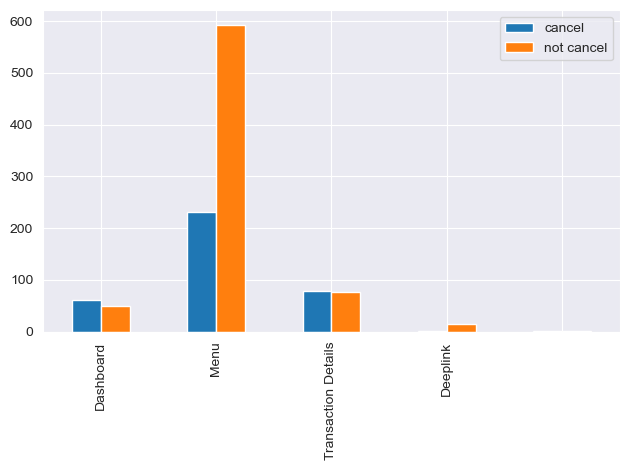

In [50]:
from_counter_df.plot(kind='bar')
plt.tight_layout()
plt.show()